<span style="font-size: 15px;">
 ----------------------------------------------------------------- <br>
 Project: House Prices Prediction <br>
 Author: Jairo Macedo <br>
 Created: June 2024 <br>
 Last Modified: [04, 2025] | By: Jairo Macedo <br>
 ----------------------------------------------------------------- <br>
 Description: <br>
 This Python notebook contains the code and analysis for the project <br>
 "House Prices Prediction". The goal is to model and predict house prices <br>
 using a variety of property features. The dataset comes from a Kaggle <br>
 competition and includes rich details about homes and their sale prices. <br>
 ----------------------------------------------------------------- <br>
 The analysis is structured as follows: <br>
 1. Data Import and Exploration: Loading and understanding the dataset. <br>
 2. Feature Engineering: Creating and selecting relevant variables. <br>
 3. Modeling: Applying and tuning machine learning models to predict prices. <br>
 4. Evaluation: Assessing model performance and accuracy. <br>
 5. Submission: Preparing results for Kaggle submission. <br>
 ----------------------------------------------------------------- <br>

<br>
<b>Clean Dataset Files</b> <br>
- <code>train_2.csv</code> – The cleaned and preprocessed training set <br>
- <code>test_2.csv</code> – The cleaned and preprocessed test set <br>
</span>



# Packages ⚙️ and data 🗂️

In [1]:
# ================================
# Data Handling and Utilities
# ================================
import pandas as pd            # Data manipulation
import numpy as np             # Numerical operations

import matplotlib.pyplot as plt # Visualization and diagnostic plots

import zipfile                 # Reading compressed .zip files
from support import zip_path   # Path to the .zip file
from support import results_path  # Importing the path for saving results

import matplotlib.pyplot as plt
import seaborn as sns

# ================================
# Machine Learning Models
# ================================
from sklearn.model_selection import train_test_split   # Splitting dataset into training and testing sets
from sklearn.linear_model import LinearRegression      # Ordinary Least Squares (baseline model)
from sklearn import tree                               # Decision Tree Regressor (non-parametric model)
from sklearn.neighbors import KNeighborsRegressor      # K-Nearest Neighbors Regressor (non-parametric model)

# ================================
# Model Evaluation Metrics
# ================================
from sklearn.metrics import mean_absolute_error        # Mean Absolute Error (MAE)
from sklearn.metrics import mean_squared_error         # Mean Squared Error (MSE and RMSE)
from sklearn.metrics import r2_score                   # R-squared (goodness-of-fit)

In [2]:
# Setting the global random seed for reproducibility
np.random.seed(42)

In [3]:
df_train = pd.read_csv(r"C:\Users\USER\OneDrive\Github\HousePrices\Data\train_2.csv")
df_test = pd.read_csv(r"C:\Users\USER\OneDrive\Github\HousePrices\Data\test_2.csv")

# Exploratory

In [5]:
# Checking the cardinality of the data
df_test.nunique().sort_values(ascending=False).head(10)

Id             1459
LotArea        1106
GrLivArea       879
BsmtUnfSF       793
1stFlrSF        789
TotalBsmtSF     736
BsmtFinSF1      669
GarageArea      459
2ndFlrSF        407
MasVnrArea      303
dtype: int64

In [6]:
# Checking the cardinality of the data
df_train.nunique().sort_values(ascending=False).head(10)


Id             1460
LotArea        1073
GrLivArea       861
BsmtUnfSF       780
1stFlrSF        753
TotalBsmtSF     721
SalePrice       663
BsmtFinSF1      637
GarageArea      441
2ndFlrSF        417
dtype: int64

In [7]:
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

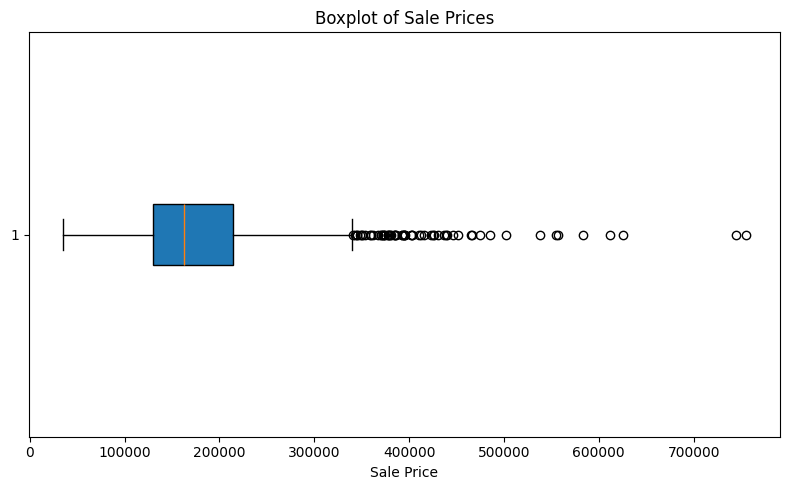

In [12]:
plt.figure(figsize=(8, 5))
plt.boxplot(df_train['SalePrice'], vert=False, patch_artist=True)
plt.title('Boxplot of Sale Prices')
plt.xlabel('Sale Price')
plt.grid(False)
plt.tight_layout()
plt.show()


In [14]:
# Calculating and displaying the correlation of all numerical features with SalePrice, sorted
correlations = df_train.select_dtypes(include='number').corr()['SalePrice'].sort_values()

print(correlations)

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
GarageYrBlt      0.261354
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.330222
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

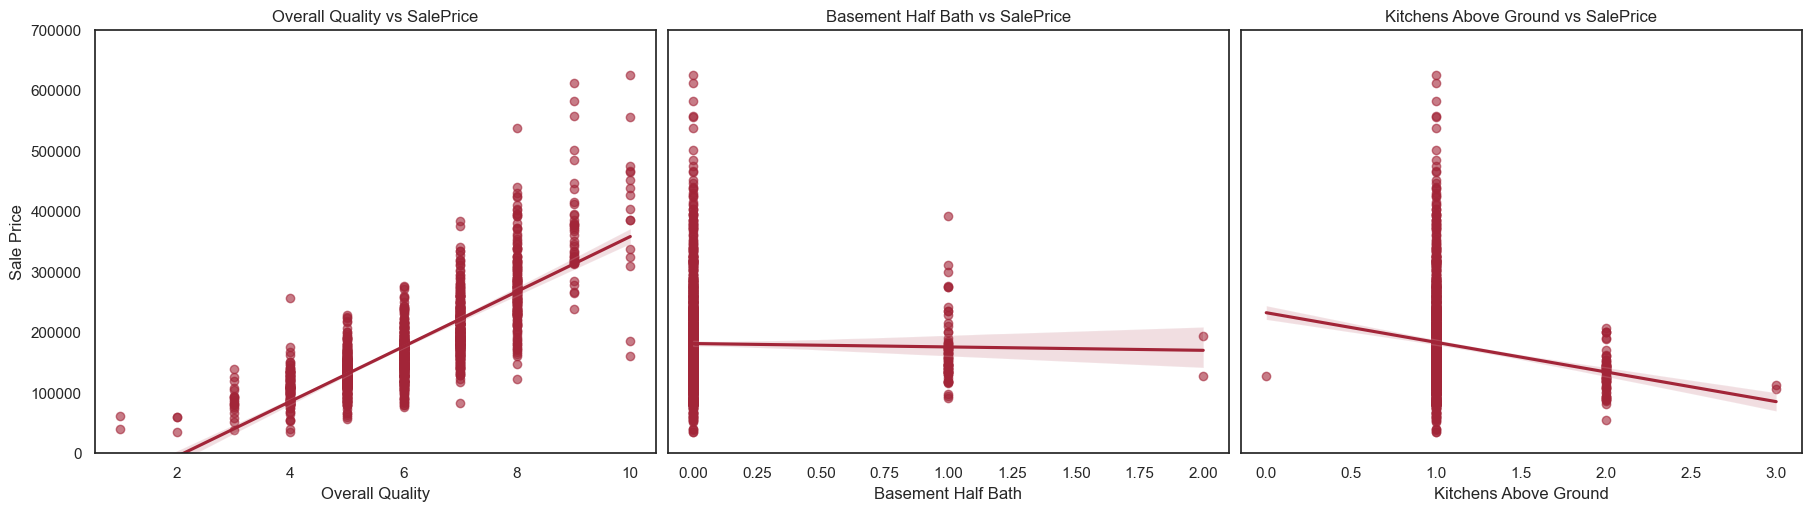

In [18]:
# Custom wine red color
wine_red = (162 / 255, 37 / 255, 56 / 255)

# Remove seaborn grid style
sns.set_style("white")

# Criando os subplots
fig, ax = plt.subplots(ncols=3, figsize=(18, 5), constrained_layout=True)

features = ['OverallQual', 'BsmtHalfBath', 'KitchenAbvGr']
titles = ['Overall Quality', 'Basement Half Bath', 'Kitchens Above Ground']

for i in range(3):
    sns.regplot(
        data=df_train,
        x=features[i],
        y='SalePrice',
        ax=ax[i],
        scatter_kws={'alpha': 0.6, 'color': wine_red},
        line_kws={'color': wine_red},  # Ainda aparece a linha de tendência
    )
    ax[i].set_title(f'{titles[i]} vs SalePrice', fontsize=12)
    ax[i].set_xlabel(titles[i])
    ax[i].set_ylabel('Sale Price' if i == 0 else '')
    ax[i].set_ylim(0, 700000)
    ax[i].grid(False)  # Remove grid
    if i > 0:
        ax[i].set_yticklabels([])

plt.show()



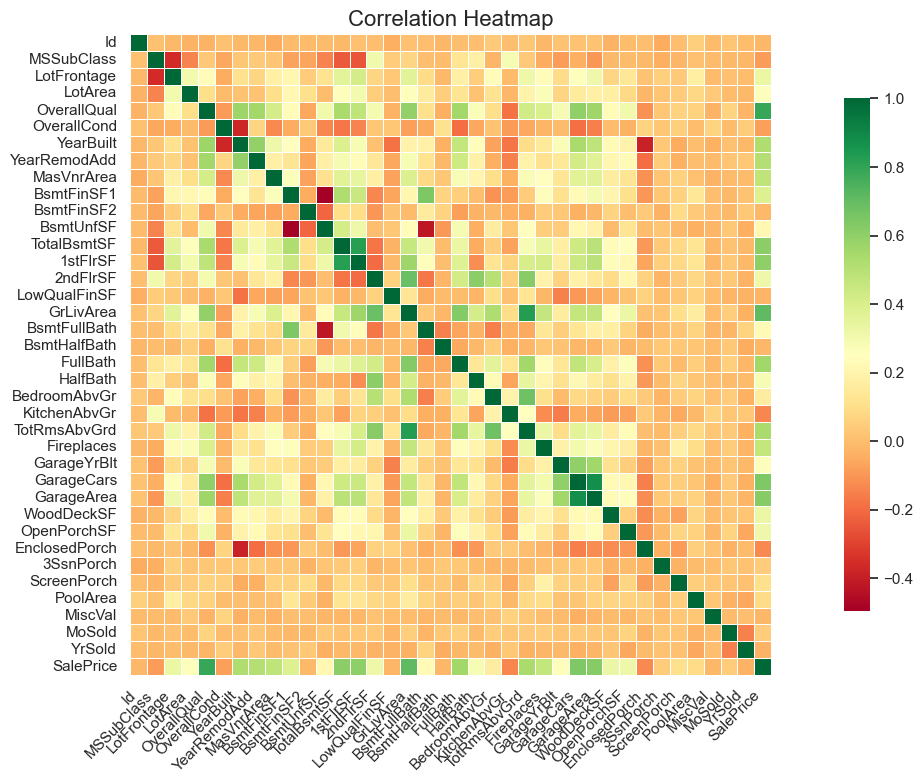

In [22]:
# Select only numerical columns
corr_matrix = df_train.select_dtypes(include='number').corr()

# Create the heatmap
fig, ax = plt.subplots(figsize=(15, 8))

sns.heatmap(
    corr_matrix,
    cmap='RdYlGn',
    annot=False,        # Display correlation values
    fmt=".2f",         # Number format
    linewidths=0.5,    # Lines between cells
    square=True,
    cbar_kws={'shrink': 0.8},  # Smaller color bar
    ax=ax
)

ax.set_title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
